In [31]:
import numpy as np
import matplotlib.pyplot as plt

### Metropolis-Hastings sampler

In [6]:
# Metropolis-Hastings algorithm
def Metropolis_Hastings(target, proposal_std = 1.0, n_samples = 10000, initial_state = 0):
    samples = []
    current = initial_state
    
    for _ in range(n_samples):
        proposal = np.random.normal(current, proposal_std) # proposed new state
        
        alpha = min(1, (target(proposal)/target(current))) # acceptance probability
        
        if np.random.rand() < alpha:
            current = proposal
        
        samples.append(current)
    
    return np.array(samples)

In [34]:
# Target distribution: Standard normal (mean = 0, std = 1)
def std_normal_distribution(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

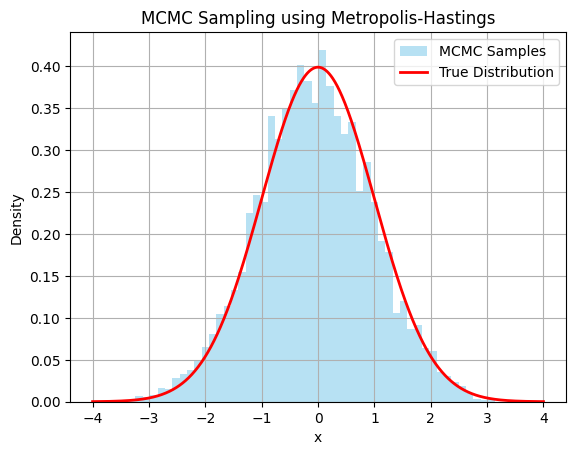

In [7]:
samples1 = Metropolis_Hastings(std_normal_distribution, proposal_std = 1.0, n_samples = 10000, initial_state = 0)

x = np.linspace(-4, 4, 1000)
plt.hist(samples1, bins=50, density=True, alpha=0.6, color='skyblue', label='MCMC Samples')
plt.plot(x, std_normal_distribution(x), 'r-', lw=2, label='True Distribution')
plt.title("MCMC Sampling using Metropolis-Hastings")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Traget distribution : Weibull distribution (shape = 1.5, scale = 1.0)
def weibull_distribution(x, k = 1.5, l = 1.0):
    x = np.asarray(x)
    result = np.zeros_like(x, dtype = float)
    mask = x > 0
    result[mask] = (k/l) * (x[mask]/l)**(k-1) * np.exp(-(x[mask]/l)**k)
    return result

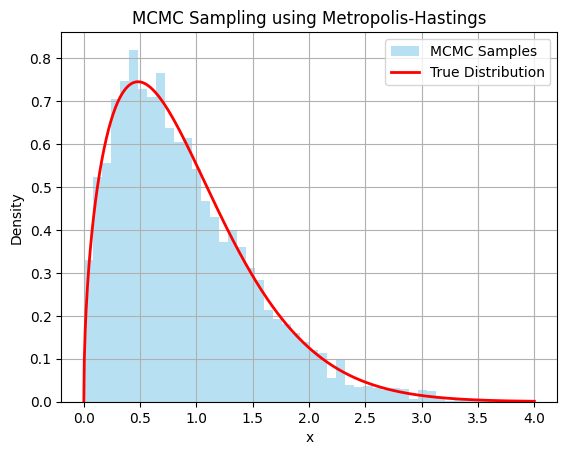

In [10]:
samples2 = Metropolis_Hastings(weibull_distribution, proposal_std = 1.0, n_samples = 10000, initial_state = 1.0)

x = np.linspace(0, 4, 1000)
plt.hist(samples2, bins=50, density=True, alpha=0.6, color='skyblue', label='MCMC Samples')
plt.plot(x, weibull_distribution(x), 'r-', lw=2, label='True Distribution')
plt.title("MCMC Sampling using Metropolis-Hastings")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

### Gibbs sampler

In [26]:
# Gibbs Algorithm
def gibbs_sampler(mu_x=0, mu_y=0, sigma_x=1, sigma_y=1, rho=0.8, n_samples=10000):
    samples = np.zeros((n_samples, 2))
    
    # Start from some initial values
    x, y = 0.0, 0.0

    for i in range(n_samples):
        # Sample x | y (x given y)
        mu_x_given_y = mu_x + rho * sigma_x / sigma_y * (y - mu_y)
        sigma_x_given_y = sigma_x * np.sqrt(1 - rho**2)
        x = np.random.normal(mu_x_given_y, sigma_x_given_y)

        # Sample y | x (y given x)
        mu_y_given_x = mu_y + rho * sigma_y / sigma_x * (x - mu_x)
        sigma_y_given_x = sigma_y * np.sqrt(1 - rho**2)
        y = np.random.normal(mu_y_given_x, sigma_y_given_x)

        samples[i] = [x, y]

    return samples

In [27]:
# --- True PDF for bivariate normal with mean 0 and correlation rho ---
def bivariate_normal_pdf(x, y, mu_x=0, mu_y=0, sigma_x=1, sigma_y=1, rho=0.8):
    z = ((x - mu_x)**2 / sigma_x**2 +
         (y - mu_y)**2 / sigma_y**2 -
         2 * rho * (x - mu_x) * (y - mu_y) / (sigma_x * sigma_y))
    denom = 2 * np.pi * sigma_x * sigma_y * np.sqrt(1 - rho**2)
    return np.exp(-z / (2 * (1 - rho**2))) / denom

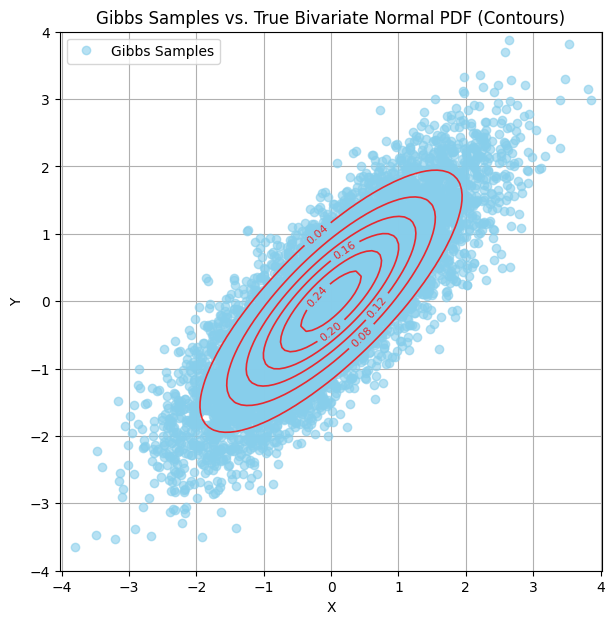

In [39]:
# --- Run the Gibbs sampler ---
samples3 = gibbs_sampler(mu_x=0, mu_y=0, sigma_x=1, sigma_y=1, rho=0.8, n_samples=10000)

# --- Create a meshgrid to evaluate the true PDF ---
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
Z = bivariate_normal_pdf(X, Y, rho=0.8)

# --- Plotting ---
plt.figure(figsize=(7, 7))

# Gibbs samples
plt.plot(samples3[:, 0], samples3[:, 1], 'o', color = 'skyblue', alpha=0.6, label='Gibbs Samples')

# Contours of the true distribution
contour = plt.contour(X, Y, Z, levels=6, colors='red', linewidths=1.2, alpha=0.8)
plt.clabel(contour, fontsize=8)
plt.title("Gibbs Samples vs. True Bivariate Normal PDF (Contours)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()